In [83]:
!pip install pandas numpy matplotlib seaborn plotly

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [85]:
data = pd.read_csv('data/All the Intermediate Colleges in_Pakistan.csv')  # Update with actual file path

In [86]:
data.head()       # First few records



,Name,Location,Study Program,Sector,Affiliation,Rating
0,Campus.pk Lahore,"Office 206, 2nd Floor Siddique Trade Center Ma...",FSc Pre Engineering Fsc Pre Medical,Private,ads,0*
1,Allama Iqbal Open University Aiou Islamabad,"Sector H-8, Islamabad-44000",FSc Pre Engineering ICs Computer Science FSc P...,Public,NaN,5*
2,Government College University Gcu Lahore,"GC University, Katchery Road Lahore 54000",FSc Pre Engineering ICS Computer Science FSc P...,Public,HEC,4*
3,Govt College University GCU Faisalabad,"Kotwali Rd, Faisalabad 38000",FSc Pre-Engineering ICS FSc Pre-Medical Icom F...,Public,HEC,3*
4,Lahore College For Women University (Lcwu) Lahore,"Near Wapda Flats, Jail Road, Lahore",FA Arts FSc Pre Engineering ICS Physics ICS St...,Public,NaN,5*


In [88]:
# Display dataset shape
print("Dataset Shape:", data.shape)


Dataset Shape: (1630, 6)


In [89]:
# Display information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           1630 non-null   object
 1   Location       1626 non-null   object
 2   Study Program  1630 non-null   object
 3   Sector         1101 non-null   object
 4   Affiliation    155 non-null    object
 5   Rating         1630 non-null   object
dtypes: object(6)
memory usage: 76.5+ KB


In [90]:
# Check for missing values
data.isnull().sum()

Name                0
Location            4
Study Program       0
Sector            529
Affiliation      1475
Rating              0
dtype: int64

In [91]:
# Drop duplicates if any
data.drop_duplicates(inplace=True)



In [92]:
# For numerical columns, fill missing values with the column median
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col].fillna(data[col].median(), inplace=True)

In [93]:
# For categorical columns, fill with mode (common value) if needed
for col in data.select_dtypes(include='object').columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

c:\Users\e\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


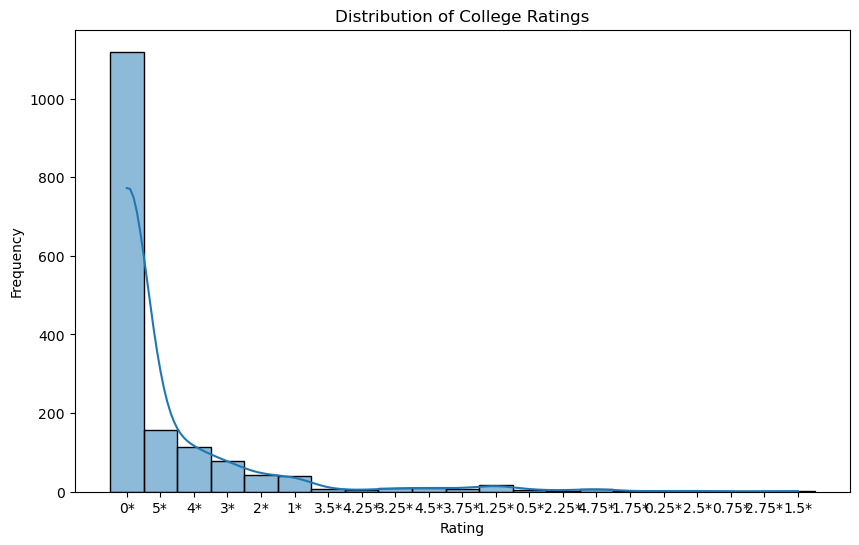

In [94]:
# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'], bins=10, kde=True)
plt.title('Distribution of College Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


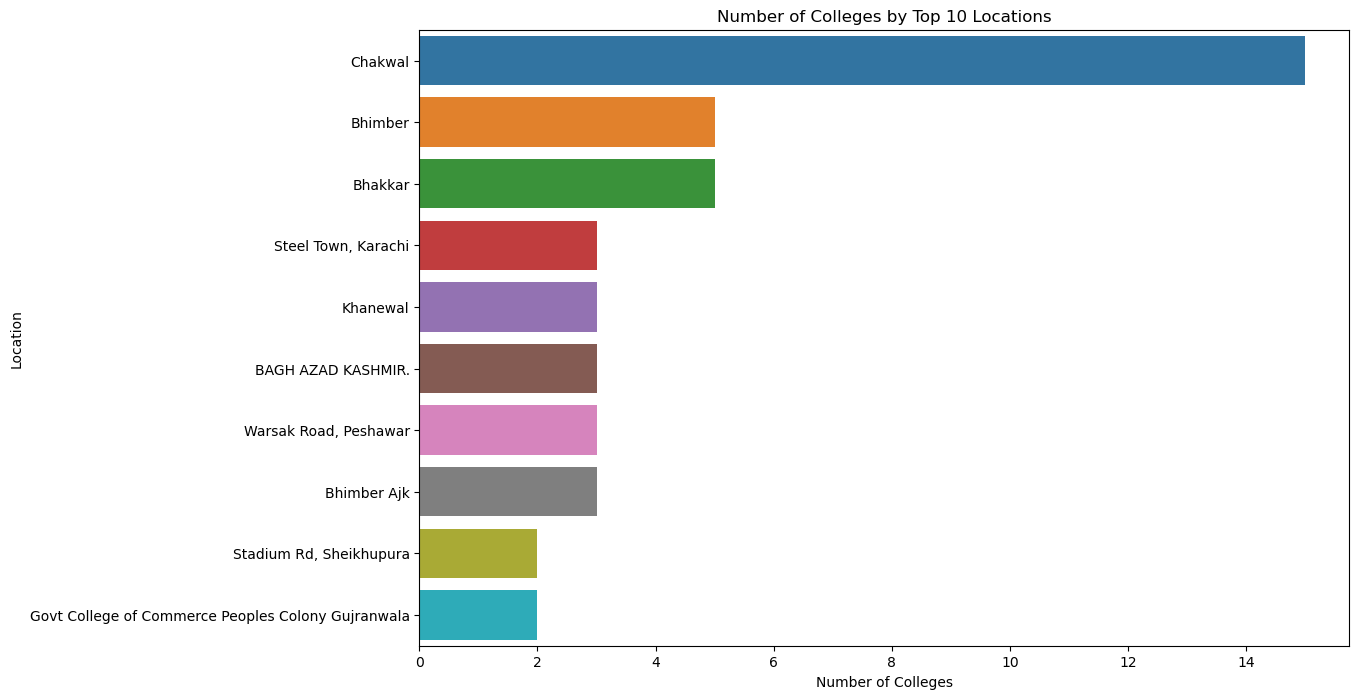

In [95]:
plt.figure(figsize=(12, 8))
top_locations = data['Location'].value_counts().nlargest(10).index
sns.countplot(y='Location', data=data[data['Location'].isin(top_locations)], order=top_locations)
plt.title('Number of Colleges by Top 10 Locations')
plt.xlabel('Number of Colleges')
plt.ylabel('Location')
plt.show()

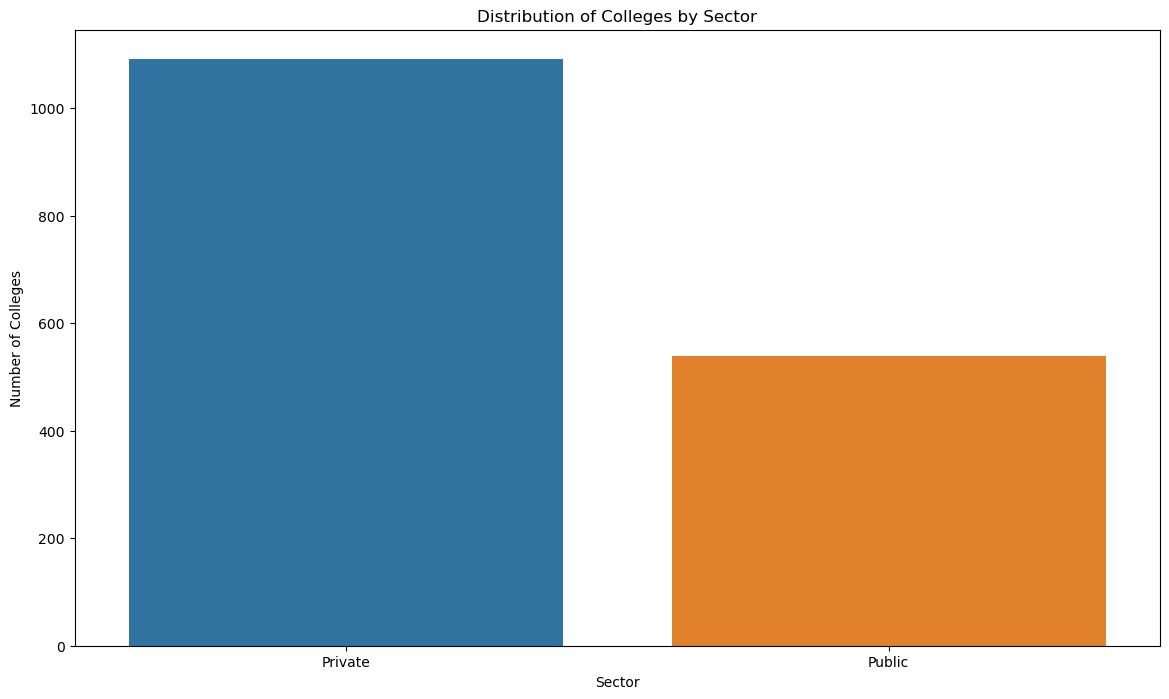

In [96]:
# Count of colleges by sector (e.g., Public vs. Private)
plt.figure(figsize=(14, 8))
sns.countplot(x='Sector', data=data)
plt.title('Distribution of Colleges by Sector')
plt.xlabel('Sector')
plt.ylabel('Number of Colleges')
plt.show()


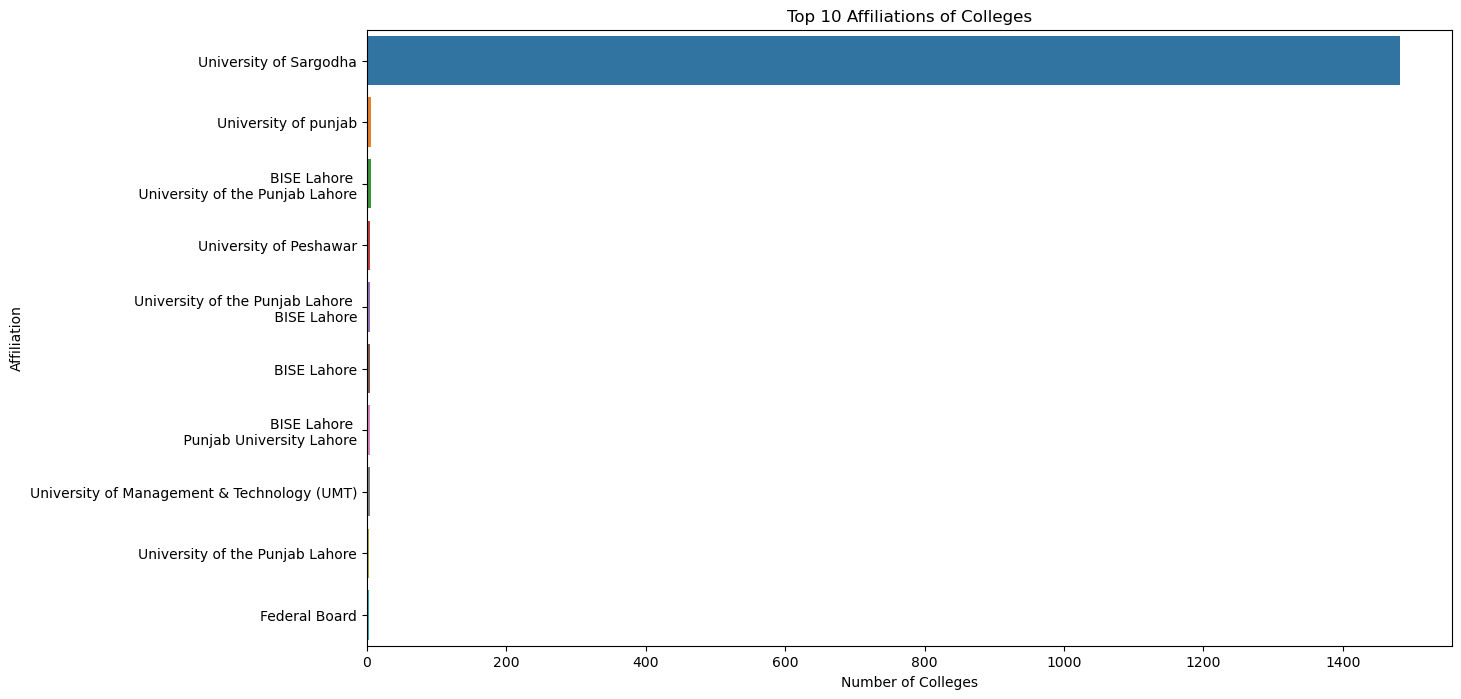

In [99]:
# Plot only top 10 affiliations
top_affiliations = data['Affiliation'].value_counts().nlargest(10).index
filtered_data = data[data['Affiliation'].isin(top_affiliations)]

plt.figure(figsize=(14, 8))
sns.countplot(y='Affiliation', data=filtered_data, order=top_affiliations)
plt.title('Top 10 Affiliations of Colleges')
plt.xlabel('Number of Colleges')
plt.ylabel('Affiliation')
plt.show()
